## PHYS 105A:  Introduction to Scientific Computing

# Data Processing with Python

In this assignment, we will use python to process climate data.

In [10]:
# Step 1. Import Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import math

In [11]:
# Step 2. Load data from csv file

df = pd.read_csv('GlobalTemperatures.csv')
# You may look at the column names by
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [12]:
# Step 3. Convert the "dt" column to datetime format

df.dt = pd.to_datetime(df.dt) # what function to call here?

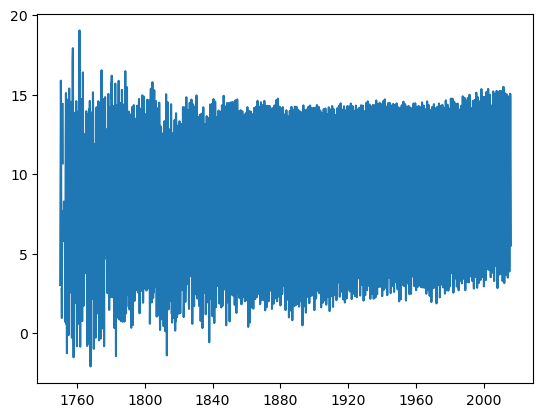

In [13]:
# Step 4. Plot the different columns

plt.plot(df.dt, df.LandAverageTemperature)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,,
1,1882-07-02 06:13:32.030074880,2.275211,1.309429,8.178657,0.544428,-2.934572,0.521645,13.458054,0.140849
2,1882-08-02 06:13:32.030075392,2.961521,1.289389,8.921410,0.541265,-2.672711,0.506819,13.722807,0.139765
3,1882-08-30 12:00:00.000000000,4.956872,1.033613,11.137169,0.480904,-0.866500,0.456060,14.339988,0.129904
4,1882-09-30 12:00:00.000000000,8.248688,0.877071,14.290331,0.472970,2.247699,0.426380,15.215886,0.127337
5,1882-10-30 12:00:00.000000000,11.153053,0.819394,17.133729,0.497590,5.179536,0.415988,15.996398,0.128349
6,1882-11-30 12:00:00.000000000,13.343415,0.774898,19.226663,0.466223,7.407331,0.366054,16.597602,0.122976
7,1882-12-30 12:00:00.000000000,14.307784,0.782561,20.070217,0.490187,8.423861,0.384349,16.902639,0.126861
8,1883-01-30 12:00:00.000000000,13.760064,0.778060,19.646892,0.435440,7.960934,0.389127,16.809410,0.128367
9,1883-03-02 12:00:00.000000000,11.723170,0.762015,17.831620,0.410880,6.138301,0.388373,16.212114,0.122139


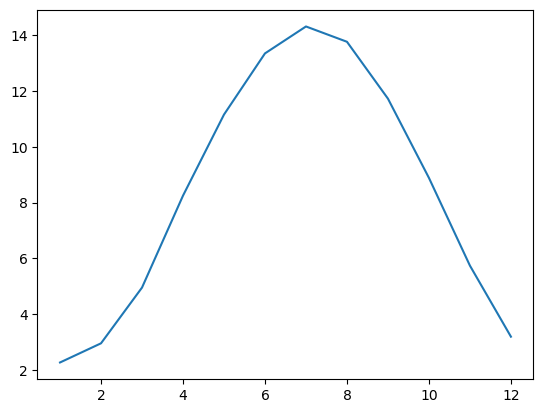

In [14]:
# Step 5. Average the temperature every year
#
# The seasonal changes in temperature is confusing.
# Let's try to average them out by using pandas' "groupby()" function.
# What do you see?

ym = df.groupby(by=[df.dt.dt.month]).mean()

display(ym)

plt.plot(ym.index, ym.LandAverageTemperature)

In [15]:
# Step 6. Fit a model to the global temperature changes

# Construct a model
def func(t, offset, amplitude, phase):
    return offset + amplitude * np.sin(2* math.pi*(t- phase)/12)

popt, pcov = curve_fit(func, ym.index, ym.LandAverageTemperature)

# This contains the fitted parameters
print(popt)

[ 8.37967531 -6.05352346 10.11245158]


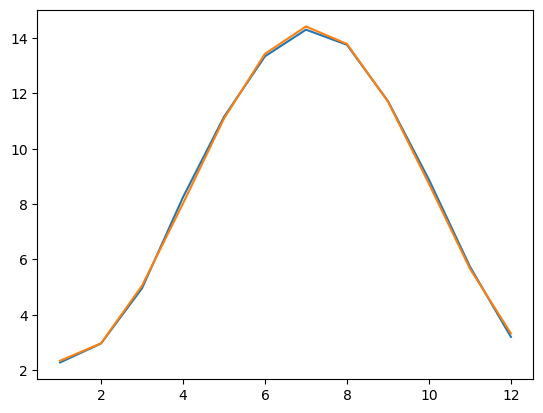

In [17]:
# Step 7. Overfit the model to the data.

plt.plot(ym.index, ym.LandAverageTemperature)
plt.plot(ym.index, func(ym.index, *popt))